<h1> Nobel Prize exploration </h1>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (0.89 * 12, 6)
plt.style.use('fivethirtyeight')
%matplotlib inline

<h3>Importing data into pandas dataframe</h3>

In [2]:
np1=pd.read_csv('nobel_prize_by_winner.csv',encoding = "ISO-8859-1",index_col=0)
np2=pd.read_csv('nobel_prizes_by_date.csv',encoding = "ISO-8859-1",index_col=3)

In [3]:
np1.head()

,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
id,,,,,,,,,,,,,,,,,,,
846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA
846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA
783,Wangari Muta,Maathai,4/1/1940,9/25/2011,Kenya,KE,Nyeri,Kenya,KE,Nairobi,female,2004.0,peace,NaN,1.0,"""for her contribution to sustainable developme...",NaN,NaN,NaN
230,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,GB,Shipston-on-Stour,female,1964.0,chemistry,NaN,1.0,"""for her determinations by X-ray techniques of...","University of Oxford, Royal Society",Oxford,United Kingdom
918,Youyou,Tu,12/30/1930,0000-00-00,China,CN,Zhejiang Ningbo,NaN,NaN,NaN,female,2015.0,medicine,NaN,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China


In [4]:
np2.head()

,year,category,overallMotivation,firstname,surname,motivation,share
id,,,,,,,
928,2016,physics,NaN,David J.,Thouless,"""for theoretical discoveries of topological ph...",2
929,2016,physics,NaN,F. Duncan M.,Haldane,"""for theoretical discoveries of topological ph...",4
930,2016,physics,NaN,J. Michael,Kosterlitz,"""for theoretical discoveries of topological ph...",4
931,2016,chemistry,NaN,Jean-Pierre,Sauvage,"""for the design and synthesis of molecular mac...",3
932,2016,chemistry,NaN,Sir J. Fraser,Stoddart,"""for the design and synthesis of molecular mac...",3


In [5]:
np1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 846 to 550
Data columns (total 19 columns):
firstname            966 non-null object
surname              936 non-null object
born                 946 non-null object
died                 946 non-null object
bornCountry          940 non-null object
bornCountryCode      940 non-null object
bornCity             938 non-null object
diedCountry          601 non-null object
diedCountryCode      600 non-null object
diedCity             595 non-null object
gender               972 non-null object
year                 966 non-null float64
category             966 non-null object
overallMotivation    16 non-null object
share                966 non-null float64
motivation           878 non-null object
name                 720 non-null object
city                 714 non-null object
country              714 non-null object
dtypes: float64(2), object(17)
memory usage: 151.9+ KB


In [61]:
counts=np1['country'].value_counts().sort_values(ascending=False).reset_index()
counts.columns=["country","counts"]

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

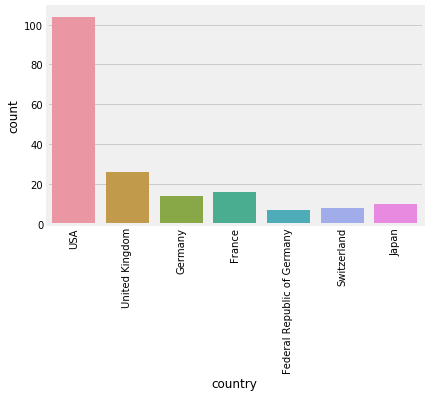

In [6]:
g=sns.countplot(x='country',data=np1[np1['category']=='physics'],order=np1.country.value_counts().iloc[:7].index)
plt.xticks(rotation=90)

<h4>Categories</h4>

In [15]:
cats=np1['category'].unique()
print(cats)

['economics' 'peace' 'chemistry' 'medicine' 'literature' 'physics' nan]


In [16]:
cats=[cat for cat in cats if str(cat)!='nan']
print(cats)

['economics', 'peace', 'chemistry', 'medicine', 'literature', 'physics']


In [17]:
red_cats=['physics','chemistry', 'medicine','economics']

<h3>Precentage of Nobel prize winners per country in each category</h3>

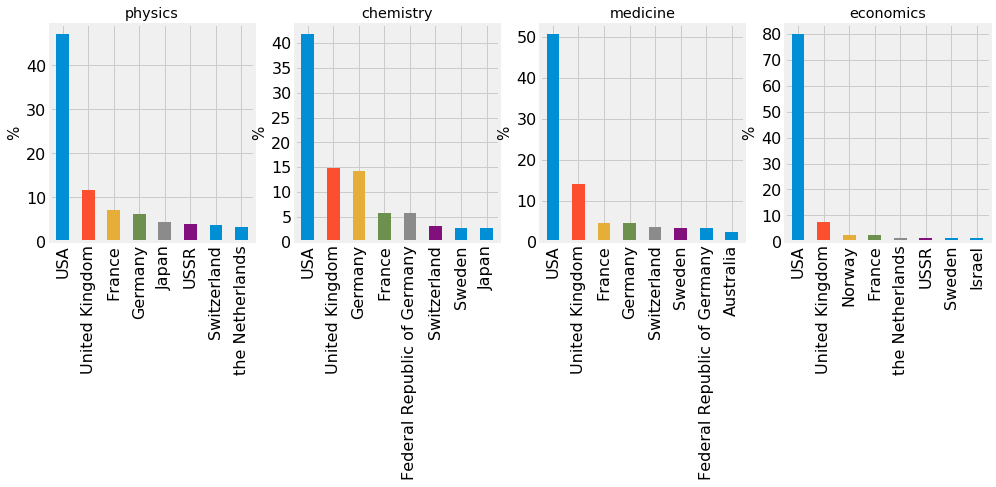

In [18]:
plt.figure(figsize=(15,4))
for i,cat in enumerate(['physics','chemistry', 'medicine','economics']):
    cnts=np1[np1['category']==cat].groupby('country').size().sort_values(ascending=False)
    plt.subplot(1,4,i+1)
    (cnts/sum(cnts)*100).plot(kind='bar',title=cat)
    plt.xlim([-0.5,7.5])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylabel('%',fontsize=15)
    plt.xlabel('')

<h3>Nobel prize winners by gender</h3>

In [20]:
np1.groupby('gender').size()

gender
female     50
male      896
org        26
dtype: int64

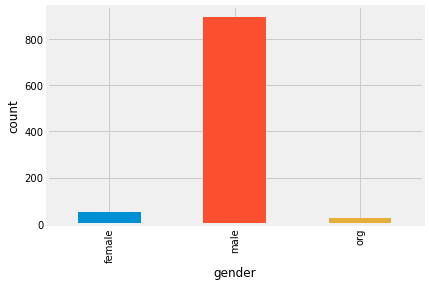

In [22]:
np1.groupby('gender').size().plot(kind='bar')
plt.ylabel('count')

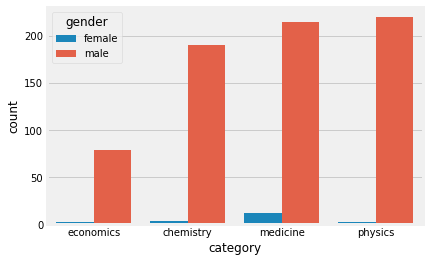

In [13]:
sns.countplot(x='category',data=np1[np1.category.isin(red_cats)],hue='gender')